In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("hr_attrition_data.csv")
df.head()

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,SalaryBand,TotalWorkingYears,YearsAtCompany,YearsInRole,...,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,OverTime,MaritalStatus,DistanceFromHome,Education,StockOptionLevel,Attrition
0,E200000,58,Female,R&D,Data Analyst,70639,High,17,8,7,...,2,3,3,3,Yes,Married,20,Below College,1,Yes
1,E200001,48,Female,HR,Team Lead,41326,Low,14,17,10,...,1,1,4,1,No,Divorced,59,College,2,No
2,E200002,34,Female,R&D,Team Lead,24597,Low,14,16,13,...,2,3,1,2,No,Single,17,Below College,1,No
3,E200003,27,Female,IT,Sales Executive,122840,Medium,5,14,12,...,4,3,2,1,Yes,Married,58,Below College,1,No
4,E200004,40,Female,Finance,Finance Analyst,50788,High,30,18,8,...,3,2,2,2,No,Single,25,Master,1,Yes


In [3]:
df.shape

(3233, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3233 entries, 0 to 3232
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               3233 non-null   object
 1   Age                      3233 non-null   int64 
 2   Gender                   3233 non-null   object
 3   Department               3233 non-null   object
 4   JobRole                  3233 non-null   object
 5   MonthlyIncome            3233 non-null   int64 
 6   SalaryBand               3233 non-null   object
 7   TotalWorkingYears        3233 non-null   int64 
 8   YearsAtCompany           3233 non-null   int64 
 9   YearsInRole              3233 non-null   int64 
 10  NumCompaniesWorked       3233 non-null   int64 
 11  TrainingTimesLastYear    3233 non-null   int64 
 12  PromotionsLast5Years     3233 non-null   int64 
 13  PerformanceRating        3233 non-null   int64 
 14  EnvironmentSatisfaction  3233 non-null  

In [5]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Gender                     0
Department                 0
JobRole                    0
MonthlyIncome              0
SalaryBand                 0
TotalWorkingYears          0
YearsAtCompany             0
YearsInRole                0
NumCompaniesWorked         0
TrainingTimesLastYear      0
PromotionsLast5Years       0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
OverTime                   0
MaritalStatus              0
DistanceFromHome           0
Education                  0
StockOptionLevel           0
Attrition                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['Attrition'].value_counts()

Attrition
Yes    1620
No     1613
Name: count, dtype: int64

In [8]:
df['Attrition'].value_counts(normalize=True)*100

Attrition
Yes    50.108259
No     49.891741
Name: proportion, dtype: float64

In [9]:
df.groupby('Department')['Attrition'].value_counts()

Department  Attrition
Finance     No           268
            Yes          250
HR          No           307
            Yes          297
IT          Yes          273
            No           263
Marketing   Yes          268
            No           262
R&D         No           261
            Yes          259
Sales       Yes          273
            No           252
Name: count, dtype: int64

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
dept_attr = df.groupby('Department')['Attrition'].value_counts(normalize=True) * 100
dept_attr

Department  Attrition
Finance     No           51.737452
            Yes          48.262548
HR          No           50.827815
            Yes          49.172185
IT          Yes          50.932836
            No           49.067164
Marketing   Yes          50.566038
            No           49.433962
R&D         No           50.192308
            Yes          49.807692
Sales       Yes          52.000000
            No           48.000000
Name: proportion, dtype: float64

In [12]:
pd.crosstab(df['SalaryBand'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
SalaryBand,,
High,48.694869,51.305131
Low,49.621928,50.378072
Medium,51.409774,48.590226


In [13]:
df.groupby('Attrition')['YearsAtCompany'].describe()

,count,mean,std,min,25%,50%,75%,max
Attrition,,,,,,,,
No,1613.0,9.555487,5.811679,0.0,5.0,9.0,15.0,19.0
Yes,1620.0,9.538272,5.804975,0.0,5.0,10.0,15.0,19.0


In [14]:
df['TenureBand'] = pd.cut(df['YearsAtCompany'],
                          bins=[0,2,5,10,20,40],
                          labels=['0-2','2-5','5-10','10-20','20+'])

pd.crosstab(df['TenureBand'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
TenureBand,,
0-2,50.151976,49.848024
2-5,50.813008,49.186992
5-10,50.693569,49.306431
10-20,49.316005,50.683995


In [15]:
pd.crosstab(df['PromotionsLast5Years'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
PromotionsLast5Years,,
0,49.756987,50.243013
1,50.031506,49.968494


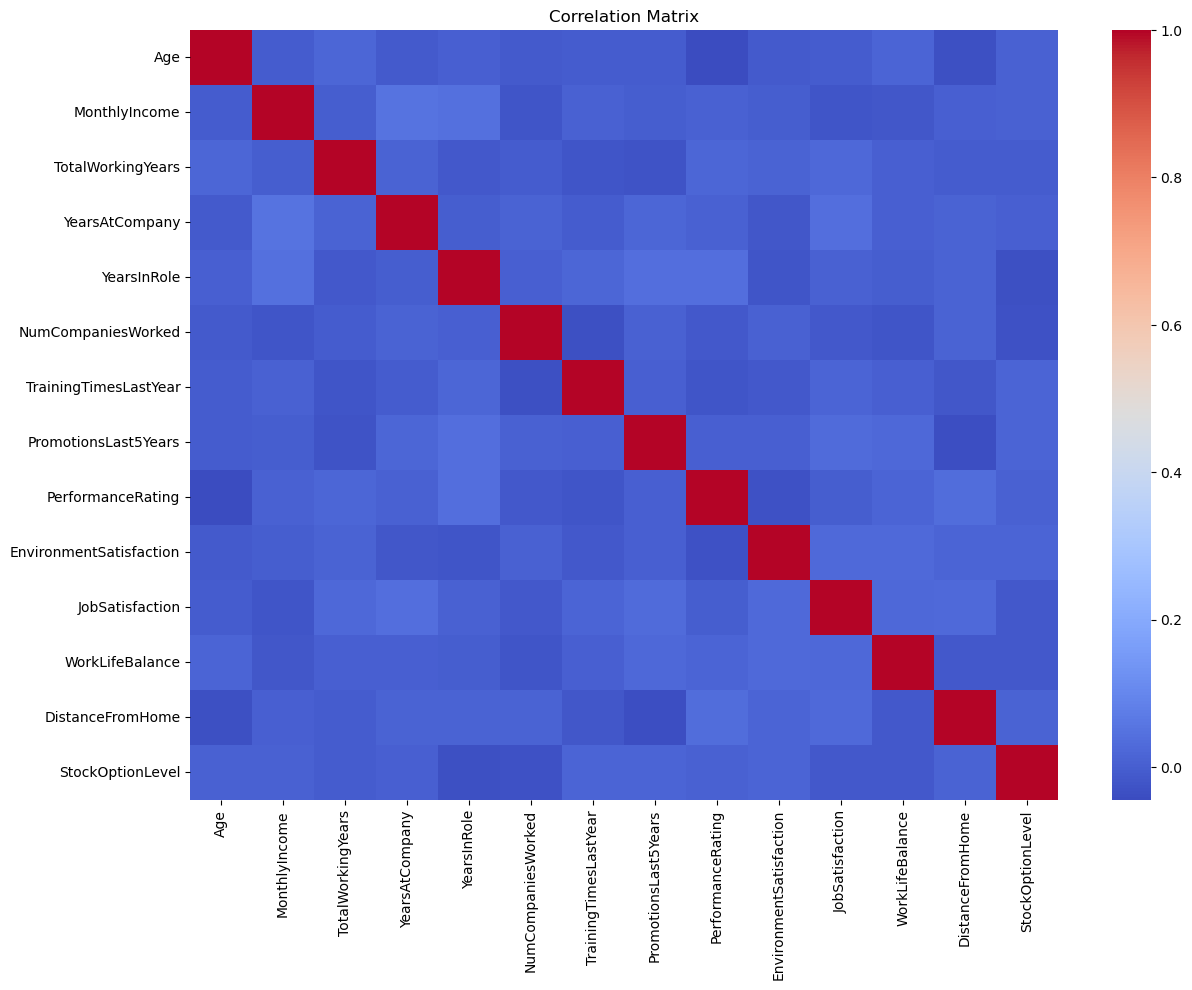

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [17]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})

In [18]:
import pandas as pd
df = pd.read_csv("hr_attrition_data.csv")
df.head()

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,SalaryBand,TotalWorkingYears,YearsAtCompany,YearsInRole,...,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,OverTime,MaritalStatus,DistanceFromHome,Education,StockOptionLevel,Attrition
0,E200000,58,Female,R&D,Data Analyst,70639,High,17,8,7,...,2,3,3,3,Yes,Married,20,Below College,1,Yes
1,E200001,48,Female,HR,Team Lead,41326,Low,14,17,10,...,1,1,4,1,No,Divorced,59,College,2,No
2,E200002,34,Female,R&D,Team Lead,24597,Low,14,16,13,...,2,3,1,2,No,Single,17,Below College,1,No
3,E200003,27,Female,IT,Sales Executive,122840,Medium,5,14,12,...,4,3,2,1,Yes,Married,58,Below College,1,No
4,E200004,40,Female,Finance,Finance Analyst,50788,High,30,18,8,...,3,2,2,2,No,Single,25,Master,1,Yes


In [19]:
print(df.head())

  EmployeeID  Age  Gender Department          JobRole  MonthlyIncome  \
0    E200000   58  Female        R&D     Data Analyst          70639   
1    E200001   48  Female         HR        Team Lead          41326   
2    E200002   34  Female        R&D        Team Lead          24597   
3    E200003   27  Female         IT  Sales Executive         122840   
4    E200004   40  Female    Finance  Finance Analyst          50788   

  SalaryBand  TotalWorkingYears  YearsAtCompany  YearsInRole  ...  \
0       High                 17               8            7  ...   
1        Low                 14              17           10  ...   
2        Low                 14              16           13  ...   
3     Medium                  5              14           12  ...   
4       High                 30              18            8  ...   

   PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  \
0                  2                        3                3   
1                  1

In [20]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1,'No':0})

In [21]:
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInRole,NumCompaniesWorked,TrainingTimesLastYear,PromotionsLast5Years,PerformanceRating,EnvironmentSatisfaction,...,JobRole_Sales Executive,JobRole_Team Lead,SalaryBand_Low,SalaryBand_Medium,MaritalStatus_Married,MaritalStatus_Single,Education_Below College,Education_College,Education_Doctor,Education_Master
0,58,70639,17,8,7,0,7,1,2,3,...,False,False,False,False,True,False,True,False,False,False
1,48,41326,14,17,10,1,7,0,1,1,...,False,True,True,False,False,False,False,True,False,False
2,34,24597,14,16,13,3,9,1,2,3,...,False,True,True,False,False,True,True,False,False,False
3,27,122840,5,14,12,1,7,0,4,3,...,True,False,False,True,True,False,True,False,False,False
4,40,50788,30,18,8,3,6,0,3,2,...,False,False,False,False,False,True,False,False,False,True


In [22]:
try:
    print("df_encoded exists:",isinstance(df_encoded, pd.DataFrame))
    print("df_encoded shape:",df_encoded.shape)
except NameError:
    print("df_encoded is not defined in the session.")

df_encoded exists: True
df_encoded shape: (3233, 3270)


In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("hr_attrition_data.csv")
df.shape

(3233, 23)

In [25]:
df = pd.read_csv(r"C:\Users\irsha\Desktop\hr_attrition_data.csv")
df.head()

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,SalaryBand,TotalWorkingYears,YearsAtCompany,YearsInRole,...,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,OverTime,MaritalStatus,DistanceFromHome,Education,StockOptionLevel,Attrition
0,E200000,58,Female,R&D,Data Analyst,70639,High,17,8,7,...,2,3,3,3,Yes,Married,20,Below College,1,Yes
1,E200001,48,Female,HR,Team Lead,41326,Low,14,17,10,...,1,1,4,1,No,Divorced,59,College,2,No
2,E200002,34,Female,R&D,Team Lead,24597,Low,14,16,13,...,2,3,1,2,No,Single,17,Below College,1,No
3,E200003,27,Female,IT,Sales Executive,122840,Medium,5,14,12,...,4,3,2,1,Yes,Married,58,Below College,1,No
4,E200004,40,Female,Finance,Finance Analyst,50788,High,30,18,8,...,3,2,2,2,No,Single,25,Master,1,Yes


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# assume df already loaded in your session
# robustly normalize target + overtime (safe even if already numeric)
df['Attrition'] = df['Attrition'].astype(str).str.strip().str.lower().replace({
    'yes':'1','y':'1','true':'1','1':'1',
    'no':'0','n':'0','false':'0','0':'0'
})
df['Attrition'] = pd.to_numeric(df['Attrition'], errors='coerce')
df['OverTime'] = df['OverTime'].astype(str).str.strip().str.lower().map({'yes':1,'no':0,'y':1,'n':0})
df['OverTime'] = pd.to_numeric(df['OverTime'], errors='coerce').fillna(0).astype(int)

# drop any rows without a valid target (rare)
df = df.dropna(subset=['Attrition']).reset_index(drop=True)
df['Attrition'] = df['Attrition'].astype(int)

# TenureBand safe creation (no harm if exists)
if 'TenureBand' not in df.columns:
    df['TenureBand'] = pd.cut(df['YearsAtCompany'],
                              bins=[-0.1,2,5,10,20,100],
                              labels=['0-2','2-5','5-10','10-20','20+'])

# one-hot encode (drop_first=True)
df_encoded = pd.get_dummies(df, drop_first=True)

# split
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("df_encoded shape:", df_encoded.shape)
print("Split shapes -> X_train, X_test:", X_train.shape, X_test.shape)
print("y_train distribution:", y_train.value_counts(normalize=True).to_dict())

df_encoded shape: (3233, 3274)
Split shapes -> X_train, X_test: (2586, 3273) (647, 3273)
y_train distribution: {1: 0.5011600928074246, 0: 0.4988399071925754}


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr), 4))
print("Confusion Matrix (LR):")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report (LR):")
print(classification_report(y_test, y_pred_lr, zero_division=0))

Logistic Regression Accuracy: 0.4853
Confusion Matrix (LR):
[[150 173]
 [160 164]]
Classification Report (LR):
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       323
           1       0.49      0.51      0.50       324

    accuracy                           0.49       647
   macro avg       0.49      0.49      0.49       647
weighted avg       0.49      0.49      0.49       647



D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

dt = DecisionTreeClassifier(random_state=42, max_depth=6)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print("\nConfusion Matrix (DT):")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report (DT):")
print(classification_report(y_test, y_pred_dt, zero_division=0))

# show top features
feat_imp = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
print("\nTop 10 Important Features:")
print(feat_imp)

Decision Tree Accuracy: 0.5085

Confusion Matrix (DT):
[[176 147]
 [171 153]]

Classification Report (DT):
              precision    recall  f1-score   support

           0       0.51      0.54      0.53       323
           1       0.51      0.47      0.49       324

    accuracy                           0.51       647
   macro avg       0.51      0.51      0.51       647
weighted avg       0.51      0.51      0.51       647


Top 10 Important Features:
MonthlyIncome           0.187634
Age                     0.120334
DistanceFromHome        0.117924
TotalWorkingYears       0.114493
YearsAtCompany          0.052776
NumCompaniesWorked      0.049849
WorkLifeBalance         0.048510
PerformanceRating       0.041368
TenureBand_10-20        0.029731
Department_Marketing    0.029447
dtype: float64


In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement shap (from versions: none)
ERROR: No matching distribution found for shap


In [4]:
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

explainer = shap.TreeExplainer(dt)
shap_vals = explainer.shap_values(X_test)   # shap_vals is a list [neg_class, pos_class] for binary

shap_mean_abs = np.abs(shap_vals[1]).mean(axis=0)
shap_series = pd.Series(shap_mean_abs, index=X_test.columns).sort_values(ascending=False)

print("Top 20 features by mean(|SHAP value|):")
print(shap_series.head(20))

shap.summary_plot(shap_vals[1], X_test, show=True)

ModuleNotFoundError: No module named 'shap'